# Books [v2]<a id="top"></a>

* [Randomized Selection](#randomized_selection)

Select books for the book club.

# Randomized Selection<a id="randomized_selection"></a>

[top](#top)

Load a spreadsheet with votes for books (exported to CSV). Consider all books with nonzero vote. Select a random book with weight proportional to the number of votes.

In [1]:
import pandas as pd
from IPython.display import display
import logging
logging.getLogger().setLevel(logging.INFO)

# read file
#books = pd.read_csv("../books_2020_05_24.csv")
#books = pd.read_csv("../books_2020_08_02.csv")
#books = pd.read_csv("../books_2020_08_16.csv")
#books = pd.read_csv("../books_2020_09_13.csv")
#books = pd.read_csv("../books_2020_11_08.csv")
books = pd.read_csv("../books_2020_12_20.csv")
#logging.info("Columns: %s",books.columns)

# select relevant columns
books = books.loc[:,['Title','Author','Общий', 
                     'Фаира','Руфина','Вика','Лена','Саша','Гена', 
                     'Голосов','Прочитана']]
                  
# rename columns
books.columns = ["title","author","score",'faira','rufina','vika','lena','sasha','gena', 
                 'n_people','finished']

# drop books with 0 and 100 score
books = books.loc[(books.score>0) & (books.score<200) & (books.finished!=1),:]

# replace missing data with zeros
books = books.fillna(0)

# weighted score
books["weighted"] = books["score"]*(books["n_people"]-2)

# throw away zero weighted score
books = books.loc[books.weighted>0,:]

# sort
books = books.sort_values(['weighted'],ascending=False)

# reindex (!!!)
books = books.reset_index(drop=True).reset_index().rename(columns={"index":"order"})

logging.info("Books considered: %s", len(books))

books.head(50)

INFO:root:Books considered: 45


,order,title,author,score,faira,rufina,vika,lena,sasha,gena,n_people,finished,weighted
0,0,Маленький принц,Экзюпери,24,1.0,1.0,4.0,12.0,5.0,1.0,6.0,0.0,96.0
1,1,Сандро из Чегема,Искандер,13,1.0,1.0,2.0,3.0,4.0,2.0,6.0,0.0,52.0
2,2,Гордость и предубеждение,Остин,12,2.0,2.0,1.0,3.0,1.0,3.0,6.0,0.0,48.0
3,3,Убить пересмешника,Ли,11,2.0,2.0,2.0,1.0,1.0,3.0,6.0,0.0,44.0
4,4,Дворянское гнездо,Тургенев,10,1.0,3.0,1.0,1.0,1.0,3.0,6.0,0.0,40.0
5,5,Мизери,Кинг,9,2.0,2.0,1.0,0.0,2.0,2.0,5.0,0.0,27.0
6,6,Мертвые души,Гоголь,9,1.0,0.0,1.0,4.0,2.0,1.0,5.0,0.0,27.0
7,7,Заповедник,Довлатов,7,1.0,1.0,1.0,1.0,3.0,0.0,5.0,0.0,21.0
8,8,Мастер и Маргарита,Булгаков,7,1.0,1.0,1.0,0.0,2.0,2.0,5.0,0.0,21.0
9,9,Град Обречённый,Стругацкие,6,0.0,1.0,2.0,1.0,1.0,1.0,5.0,0.0,18.0


In [2]:
# function to choose with weight

import numpy as np

def weighted_choice(objects, weights):
    """ returns randomly an element from the sequence of 'objects', 
        the likelihood of the objects is weighted according 
        to the sequence of 'weights', i.e. percentages."""

    weights = np.array(weights, dtype=np.float64)
    sum_of_weights = weights.sum()
    #logging.info(sum_of_weights)
    # standardization:
    #np.multiply(weights, 1 / sum_of_weights, weights)
    weights = np.multiply(weights, 1 / sum_of_weights)
    #logging.info(weights)
    weights = weights.cumsum()
    #logging.info(weights)
    x = np.random.random()
    #logging.info(x)
    for i,_ in enumerate(weights):
        if x < weights[i]:
            #logging.info("Selected index: %d out of [0-%d]", i, len(weights)-1)
            return objects[i]

# test
obj = ["a","b","c"]
weights = [1,2,3]
weighted_choice(obj,weights)

'c'

/Users/kukarzev/venv3651/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


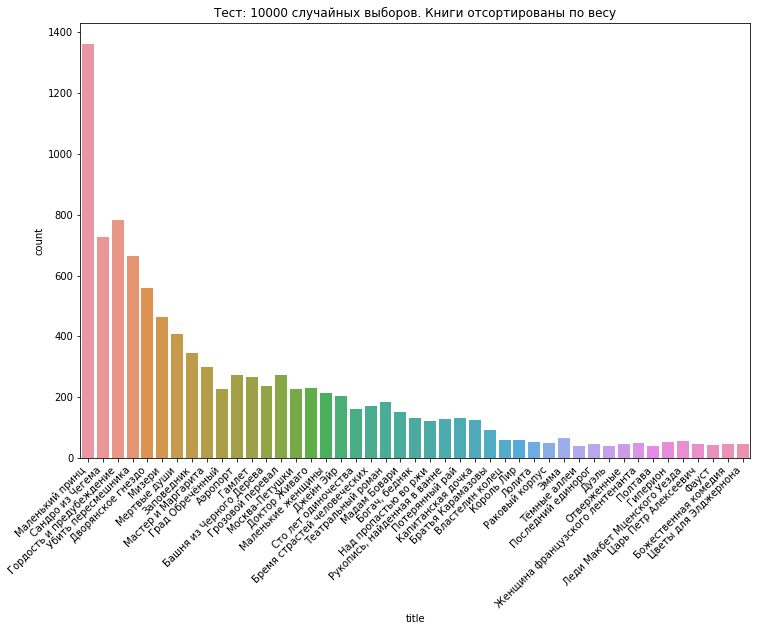

In [4]:
# test that sampling corresponds to the ordering by weight
n = 10000

# random seed
np.random.seed(123456)

titles = []
for i in range(n):
    t = weighted_choice(books.title,books.weighted)
    titles.append(t)
test = pd.DataFrame({"title":titles})#.groupby("title").size().rename("count").reset_index().sort_values("count",ascending=False)
test = test.merge(books[["title","order"]],on="title")
test.shape

import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(12,8))
ax = f.add_subplot(1,1,1)
ax.set_title("Тест: %d случайных выборов. Книги отсортированы по весу" % n)
#sns.countplot(test.title,order=test.title.value_counts().index)
sns.countplot(test.title,order=books.title)
l = ax.get_xticklabels()
p = plt.setp(l, rotation=45, ha='right')
plt.show()

In [5]:
# DO NOT CHANGE

# previous choice (resulted in Gone with the Wind)
#np.random.seed(575378)
# Gone with the Wind

# August 2, 2020
#np.random.seed(725454) - this one crashed exposing the bug
# - Emma, Lord of the Rings, 
# reindexing was not done, chose To Have and Have not by reversing the seed above
#np.random.seed(335457)
# 

# August 16,2020
#np.random.seed(2837)
#weighted_choice(books.title,books.weighted)
#

# September 13, 2020
#np.random.seed(7873)
#weighted_choice(books.title,books.weighted)
#

# November 8, 2020
#np.random.seed(32537)
#weighted_choice(books.title,books.weighted)
# Islands in the Stream

# December 20, 2020
#np.random.seed(72438)
#weighted_choice(books.title,books.weighted)
# Madame Bovary

'Мадам Бовари'